In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
from PIL import Image
pd.set_option('display.max_columns', 500)

import path

# Load data, view boxes

Let's start by reading in the data set and showing one of the images

In [2]:
train = pd.read_csv('train_with_labels_v3.csv')
train.loc[0,2]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <class 'int'>

In [3]:
name = train['OutputID'].loc[5]
img = plt.imread(f'data/train/{name}', format='jpeg')
name

'Image404_1TPP_5R_MT_FE.JPG'

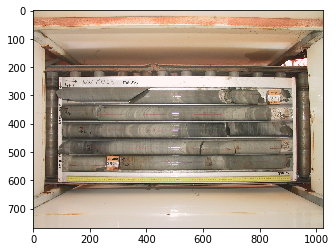

In [4]:
implot = plt.imshow(img)
#plot_row(training_path, train.iloc[0])
#plt.plot([3530], [img.shape[0] - 2347], 'o')
plt.show()

## Plotting Boxes

Let's explore the data by plotting the boxes ontop of the image. 

Here is a handy function for visualising the data. Note that the Y label needs a transformation


In [7]:
def plot_row(training_path, row):
    """
    Function to plot rows ontop of image
    
    Inputs:
    filepath: A Path object containing the location of the training data. See example. 
    row: A row from the training dataframe

    """
    
    img = plt.imread(training_path+row.OutputID)
    plt.figure()
    fig = plt.imshow(img)
    ax = fig.axes
    for r in range(1,12):
        patch = []
        for i in range(1,5):
            x = row[f'row_{r}_X_{i}']
            y = img.shape[0] - row[f'row_{r}_Y_{i}']
            patch.append([x,y])
        ax.add_patch(patches.Polygon(patch, closed=True, fill=False, linewidth=2,color='red'))

We will use the python standard pathlib to make paths easier. 

Let's grab a random sample from the dataset and visualise them

[None, None, None, None, None, None, None, None, None, None]

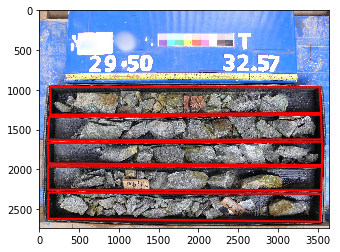

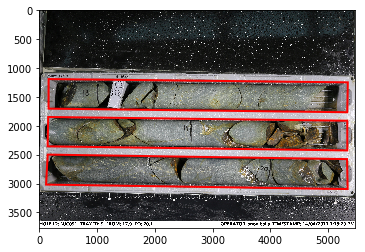

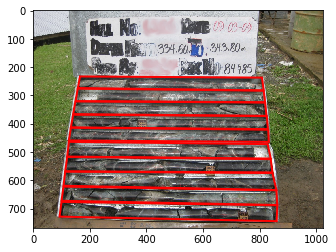

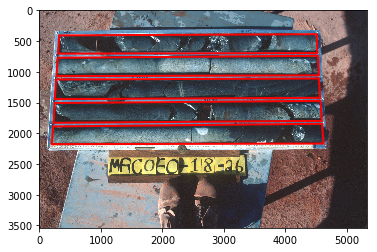

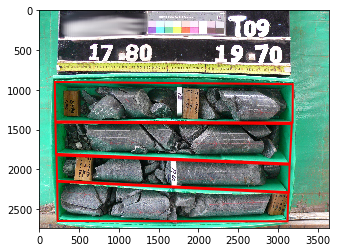

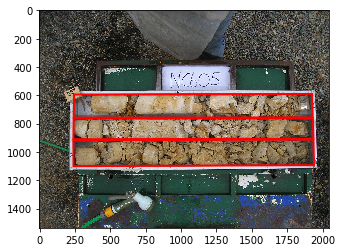

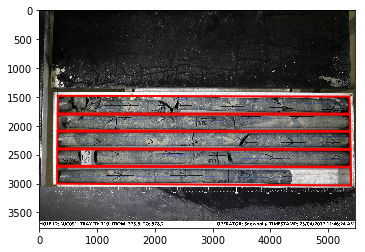

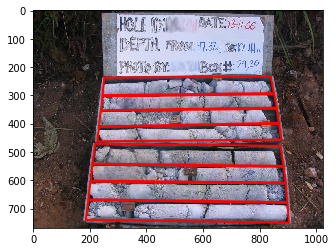

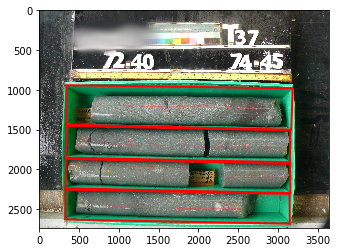

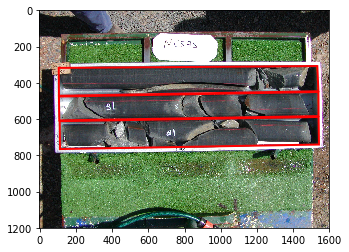

In [8]:
training_path = path.Path('./data/train/')

np.random.seed(32)  # This makes the "random" sample always the same for everyone
number_of_images=10

[plot_row(training_path, train.iloc[i]) 
 for i in np.random.choice(range(train.shape[0]), number_of_images)] # Don't worry if you haven't seen random.choice before
        
    

## Not always rectangles

One interesting thing about this problem is that not all the trays are at the same angle, and some of the trays are distorted. Thus we are specifying a 4-point polygon to determine the target area.  How can you solve this problem? 



# Predicting Classes

Each image also has an associated class, this is to do with the presence or absence of distortions, aspect ratios or bulging boxes. Let's look at examples from the different classes


In [9]:
type_0 = train.query("Type_0 == 1")
type_1= train.query("Type_1 == 1")
type_2= train.query("Type_2 == 1")
type_3= train.query("Type_3 == 1")
type_4= train.query("Type_4 == 1")
type_5= train.query("Type_5 == 1")

In [10]:
type_0.iloc[1]['MaskLocation']

'{"Type0_straight_tray":"https://imagemasks.s3.amazonaws.com/c7bfdc7ae8975dd09777465c/cjhhmhunfadhn0756yntyzb7d_Type0_straight_tray_mask.png"}'

## Type_0

These core trays appear to be nicely positioned in the image, with no distortion. These are straight trays.

[None, None, None, None, None]

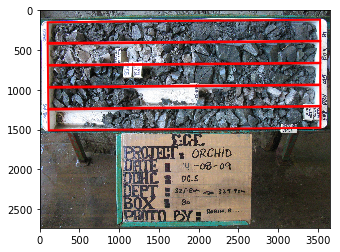

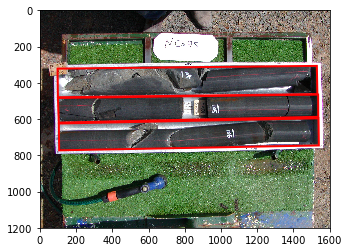

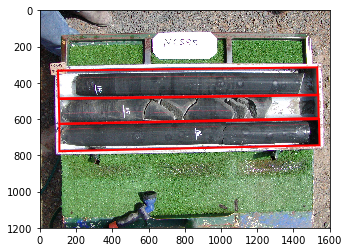

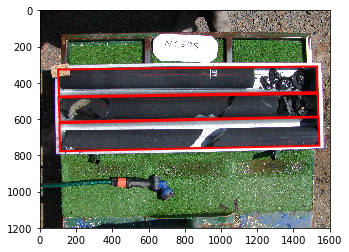

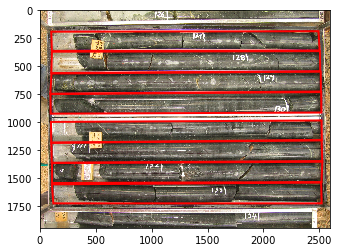

In [9]:
[plot_row(training_path, type_0.iloc[r]) for r in range(5)]

## Type_1

These core trays appear to be slightly mis-aligned in the image

[None, None, None, None, None]

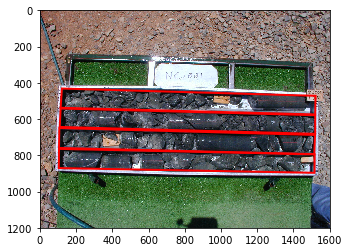

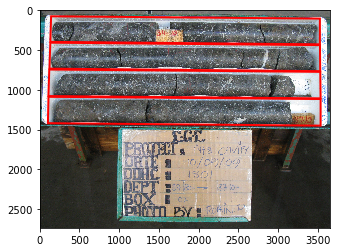

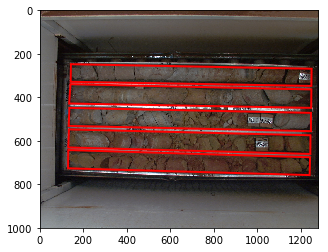

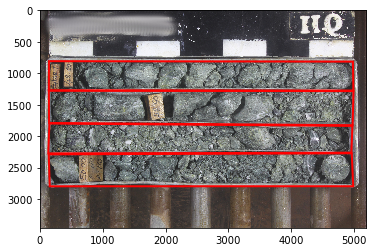

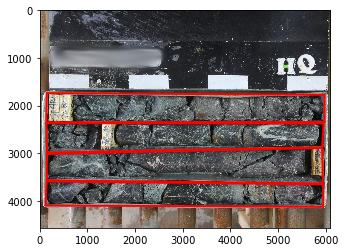

In [10]:
[plot_row(training_path, type_1.iloc[r]) for r in range(5)]

## Type_2

The images is slightly distorted in this class.. 

[None, None, None, None, None]

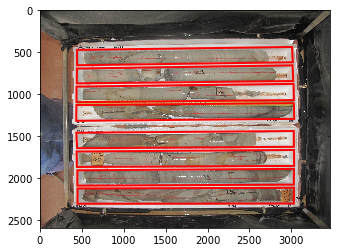

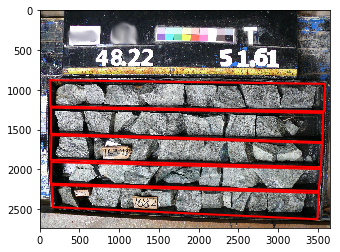

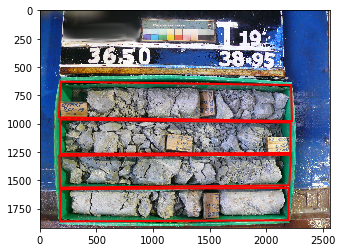

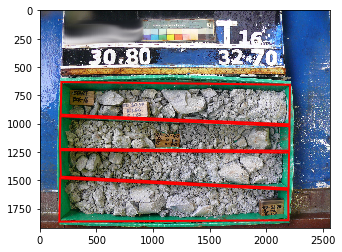

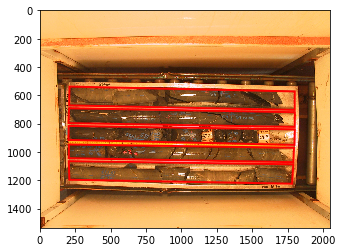

In [11]:
[plot_row(training_path, type_2.iloc[r]) for r in range(5)]

## Type_3


These trays appear to be bent and are also distorted

[None, None, None, None, None]

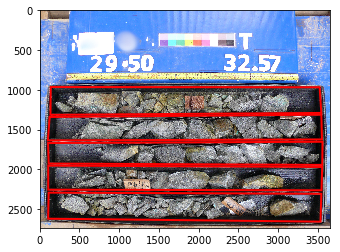

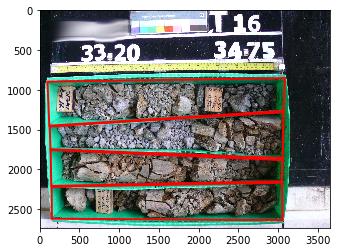

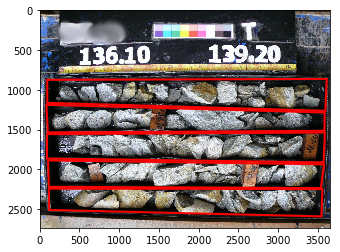

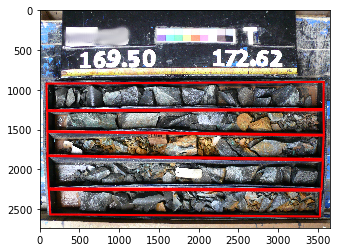

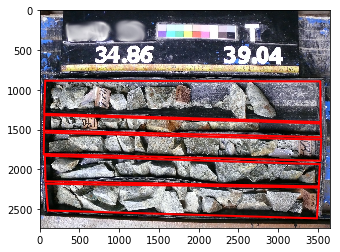

In [12]:
[plot_row(training_path, type_3.iloc[-r]) for r in range(5)]

## Type_4


These images have a low aspect ratio to them

[None, None, None, None, None]

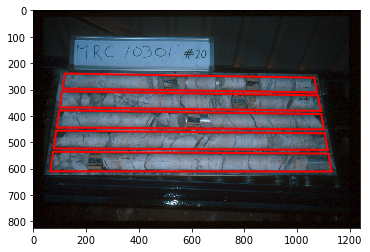

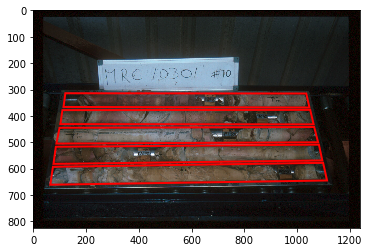

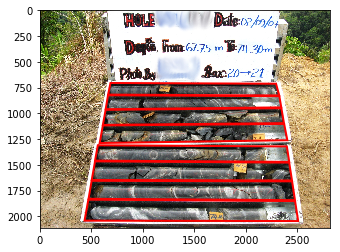

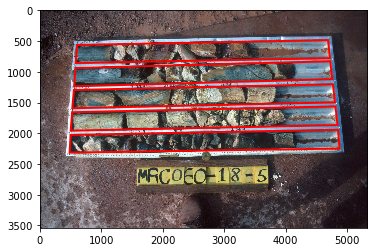

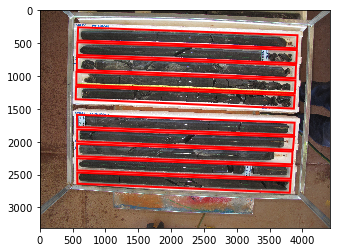

In [13]:
[plot_row(training_path, type_4.iloc[-r]) for r in range(5)]

## Type_5


These images have a low aspect ratio and some rows are also bent. 

[None, None, None, None, None]

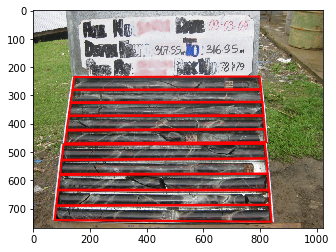

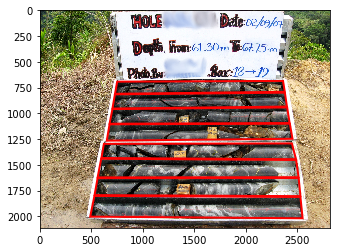

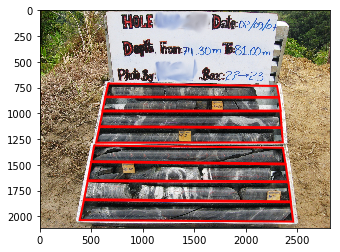

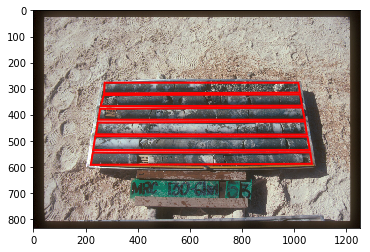

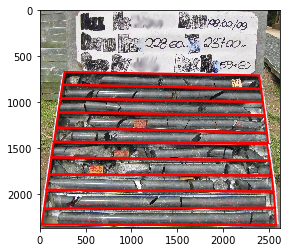

In [14]:
[plot_row(training_path, type_5.iloc[-r]) for r in range(5)]

# Submission format

You must follow this format to submit an entry. 

We will simply submit a prediction for every row which is the mean of all of the columns in the training dataset.

In [15]:
test_names = [t for t in os.listdir('data/test') if 'JPG' in t]

In [21]:
mean_value = train.mean()

In [17]:
submission = pd.DataFrame([mean_value for t in test_names])
submission['OutputID'] = test_names

In [22]:
submission.to_csv('sample_submission.csv', index=False)

0      test_img_0.JPG
1      test_img_1.JPG
2     test_img_10.JPG
3     test_img_11.JPG
4     test_img_12.JPG
5     test_img_13.JPG
6     test_img_14.JPG
7     test_img_15.JPG
8     test_img_16.JPG
9     test_img_17.JPG
10    test_img_18.JPG
11    test_img_19.JPG
12    test_img_20.JPG
13    test_img_21.JPG
14    test_img_22.JPG
15    test_img_23.JPG
16    test_img_24.JPG
17    test_img_25.JPG
18    test_img_26.JPG
19    test_img_27.JPG
20    test_img_28.JPG
21    test_img_29.JPG
22    test_img_30.JPG
23    test_img_31.JPG
24    test_img_34.JPG
25    test_img_36.JPG
26    test_img_37.JPG
27    test_img_38.JPG
28    test_img_39.JPG
29     test_img_4.JPG
           ...       
61    test_img_72.JPG
62    test_img_73.JPG
63    test_img_74.JPG
64    test_img_75.JPG
65    test_img_76.JPG
66    test_img_77.JPG
67    test_img_78.JPG
68    test_img_79.JPG
69     test_img_8.JPG
70    test_img_80.JPG
71    test_img_81.JPG
72    test_img_82.JPG
73    test_img_83.JPG
74    test_img_84.JPG
75    test